<a href="https://colab.research.google.com/github/amigolucho/Light-Curves-Simulations-LSST/blob/main/make_Light_Curves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Libraries to use

from astropy.io import fits
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

Here, you have the code for plot a simulated light curve in a specific band:

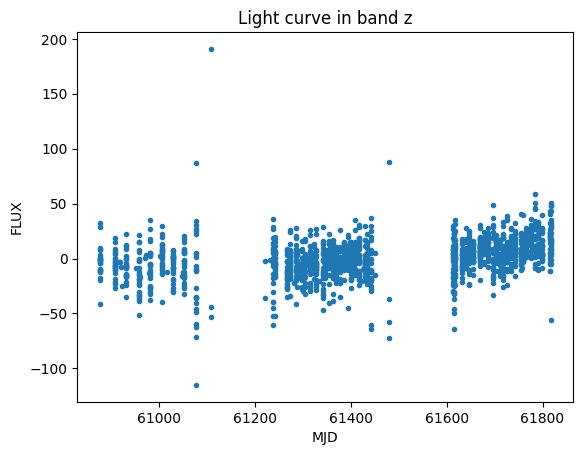

In [8]:
# Load FITS files, you can change it for wich one you want
light_curve = fits.open("AGN_20241121_12of50/AGN_20241121_12of50_PHOT.FITS")[1].data
head = fits.open("AGN_20241121_12of50/AGN_20241121_12of50_HEAD.FITS")[1].data

def plot_lightcurve(phot, head, band, lc = None):
    # We get the range of each light curve

    min = head['PTROBS_MIN']
    max = head['PTROBS_MAX']

    # You can choose any light curve (be carefull to be in the right range)
    if lc is None:
        lc = int(len(min)/2)
        print(lc)

    # Se obtiene la curva de luz y luego se filtra por la banda
    mjd = phot[min[lc] - 1 : max[lc]]
    mjd = mjd[mjd["BAND"] == band]["MJD"]

    flux = phot[min[lc] - 1 : max[lc]]
    flux = flux[flux["BAND"] == band]["FLUXCAL"]

    plt.plot(mjd,flux, ".")
    plt.title(f"Light curve in band {band}")
    plt.xlabel("MJD")
    plt.ylabel("FLUX")

    return mjd, flux

mjd, flux = plot_lightcurve(light_curve, head, "z", 1)